<a href="https://colab.research.google.com/github/szymros/kaggle-mnist-cnn/blob/main/kaggle_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd

data = pd.read_csv('train.csv')
y = pd.get_dummies(data['label']).to_numpy(dtype='float32')
data.pop(item='label')
X = data.to_numpy(dtype='float32')
X = X/255.0
X = X.reshape((-1,28,28,1))
X.shape, y

((42000, 28, 28, 1), array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]], dtype=float32))

In [61]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28,28,1), name='conv1'))
model.add(MaxPool2D(pool_size=(2,2), name='pool1'))

model.add(Conv2D(32, (3,3), name='conv2'))
model.add(MaxPool2D(pool_size=(2,2), name='pool2'))

model.add(Flatten())
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [58]:
history = model.fit(X, y, epochs=3 validation_split=0.15, batch_size=20)

Epoch 1/5
1785/1785 [==============================] - 26s 14ms/step - loss: 0.1952 - accuracy: 0.9403 - val_loss: 0.0766 - val_accuracy: 0.9781
Epoch 2/5
1785/1785 [==============================] - 25s 14ms/step - loss: 0.0614 - accuracy: 0.9808 - val_loss: 0.0642 - val_accuracy: 0.9814
Epoch 3/5
1785/1785 [==============================] - 25s 14ms/step - loss: 0.0439 - accuracy: 0.9864 - val_loss: 0.0499 - val_accuracy: 0.9851
Epoch 4/5
1785/1785 [==============================] - 25s 14ms/step - loss: 0.0328 - accuracy: 0.9892 - val_loss: 0.0604 - val_accuracy: 0.9840
Epoch 5/5
1785/1785 [==============================] - 26s 14ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0576 - val_accuracy: 0.9837


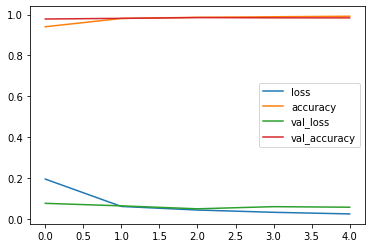

In [60]:
pd.DataFrame(history.history).plot()